# AskReddit Troll Question Detection Challenge

## Imports

In [81]:
import numpy as np 
import pandas as pd
from wordcloud import WordCloud
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:

import nltk # for tokenizing the paragraphs in sentences and sentences in words
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [83]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/architsangal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/architsangal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/architsangal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [84]:
train_df = pd.read_csv("train.csv")

## Preprocessing

### Dropping the qid

In [85]:
train_df.drop(columns=["qid"],inplace=True)
sentences = train_df['question_text'].tolist()

In [86]:
N = 653061
sentences = sentences[0:N]

### Cleaning the data

- Like removing !?., etc.
- converting sentences to lower case

In [87]:
# i=0
# for sentence in sentences:
#     temp = re.sub('[^a-zA-Z0-9]', ' ', sentence)
#     temp = temp.lower()
#     new_sentence = temp.split()
#     new_sentence = ' '.join(new_sentence)
#     sentences[i] = new_sentence
#     # print(new_sentence)
#     i+=1

,question_text,target
0,What is the role of Lua in Civ4?,0
1,What are important chapters in Kannada for 10 ...,0
2,Do musicians get royalties from YouTube?,0
3,What is the difference between Scaling Social ...,0
4,Why do elevators go super slow right before th...,0


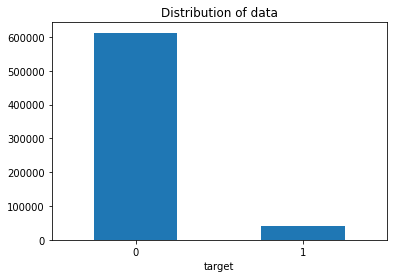

In [88]:
import matplotlib.pyplot as plt

# Plotting the distribution for dataset.
ax = train_df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['0','1'], rotation=0)

sentences = train_df['question_text'].values.astype('U')
sentences = sentences.tolist()
train_df.head()

In [89]:
from sklearn.model_selection import train_test_split 

train_X, test_X, train_y, test_y = train_test_split(train_df.drop(['target'],axis=1),train_df['target'] , train_size=0.999)

In [90]:
majority_class = train_X[train_y==0]
minority_class = train_X[train_y==1]

majority_class = majority_class['question_text'].values.astype('U')
majority_class = majority_class.tolist()

minority_class = minority_class['question_text'].values.astype('U')
minority_class = minority_class.tolist()

In [91]:
words_maj = []

for sentence in majority_class:
    for word in sentence.split():
        words_maj.append(word)

In [92]:
words_min = []

for sentence in minority_class:
    for word in sentence.split():
        words_min.append(word)

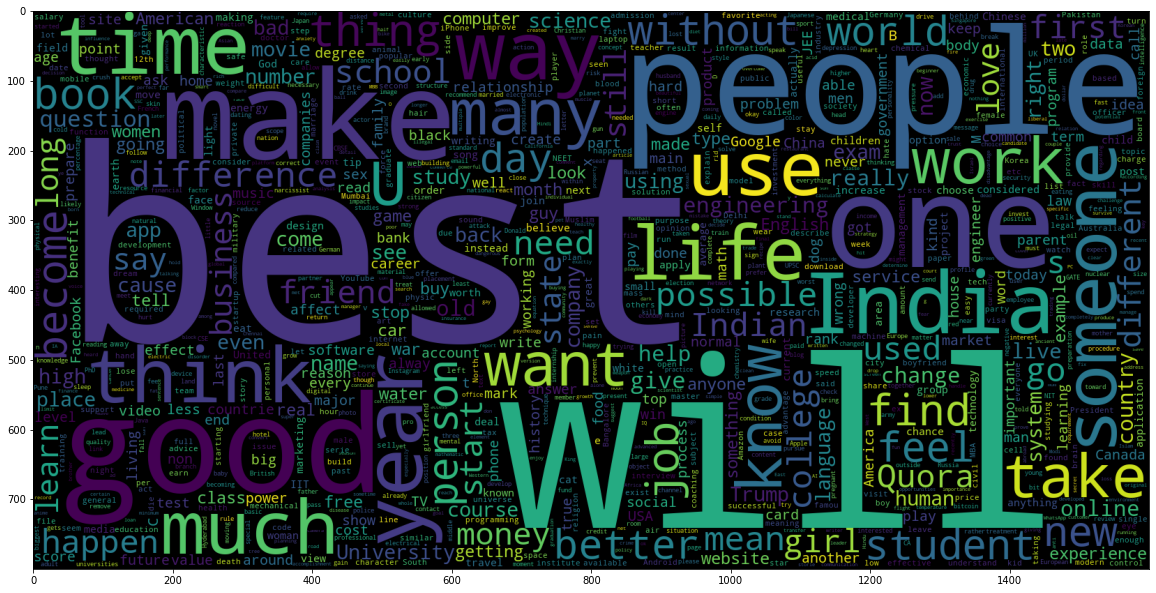

In [93]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(majority_class))
plt.imshow(wc)

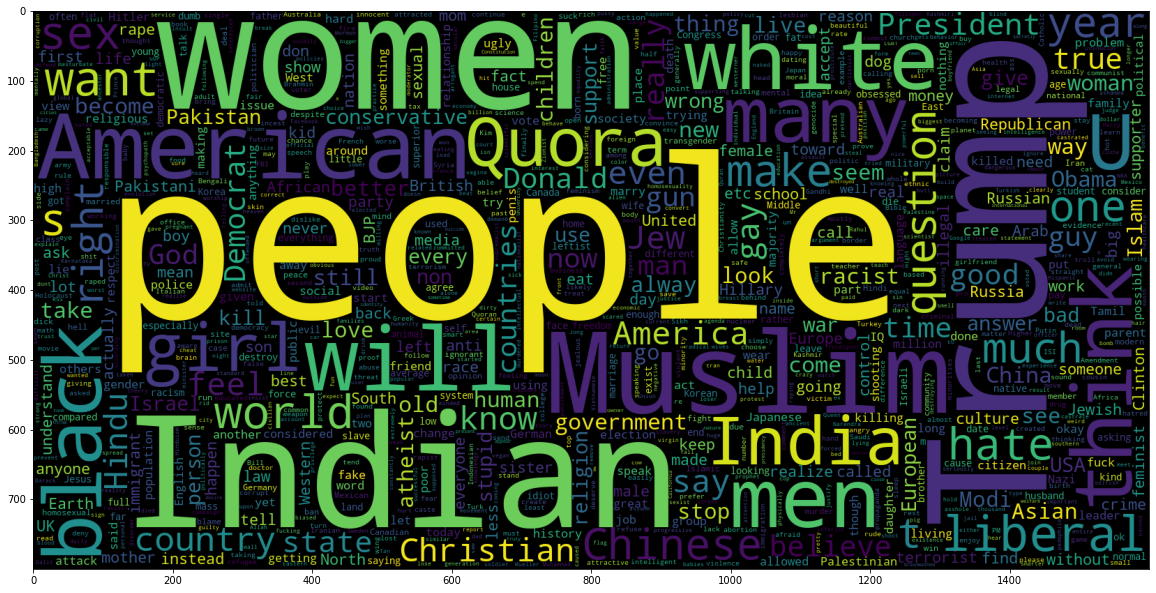

In [94]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(minority_class))
plt.imshow(wc)

In [95]:
import collections

frequency_maj = collections.Counter(words_maj)
frequency_maj = dict(frequency_maj)
item_to_be_deleted = []
for i in frequency_maj:
    if(frequency_maj[i]>=4000):
        item_to_be_deleted.append(i)
    # if(frequency_maj[i] == 20):
    #     print(i)

print(len(frequency_maj))
print(len(item_to_be_deleted))
print(len(frequency_maj)-len(item_to_be_deleted))

item_to_be_deleted1 = item_to_be_deleted


310221
162
310059


In [96]:
import collections

frequency_min = collections.Counter(words_min)
frequency_min = dict(frequency_min)
item_to_be_deleted = []
# frequency_min.sort()
for i in frequency_min:
    if(frequency_min[i]>=0):
        item_to_be_deleted.append(i)
    # if(frequency_min[i] == 10):
    #     print(i)

print(len(frequency_min))
print(len(item_to_be_deleted))
print(len(frequency_min)-len(item_to_be_deleted))

item_to_be_deleted2 = item_to_be_deleted


56611
56611
0


In [97]:
vocab_maj = []
for i in frequency_maj:
    vocab_maj.append(i)

vocab_min = []
for i in frequency_min:
    vocab_min.append(i)

# print(vocab)

In [98]:
y1_zeros = []
for i in range(len(majority_class)):
    y1_zeros.append(0)
y2_ones = []
for i in range(len(minority_class)):
    y2_ones.append(1)
train_X = majority_class+minority_class
train_y = y1_zeros+y2_ones

In [99]:
import collections

frequency_min = collections.Counter(words_min)
frequency_min = dict(frequency_min)
item_to_be_deleted = []
# frequency_min.sort()
for i in frequency_min:
    if(frequency_min[i]<=0):
        item_to_be_deleted.append(i)
    # if(frequency_min[i] == 10):
    #     print(i)

print(len(frequency_min))
print(len(item_to_be_deleted))
print(len(frequency_min)-len(item_to_be_deleted))

for i in item_to_be_deleted:
    frequency_min.pop(i)

56611
0
56611


In [100]:
vocab = vocab_maj+vocab_min
vocab = set(vocab)

test_X = test_X['question_text'].values.astype('U')
test_X = test_X.tolist()

[612048  40359]


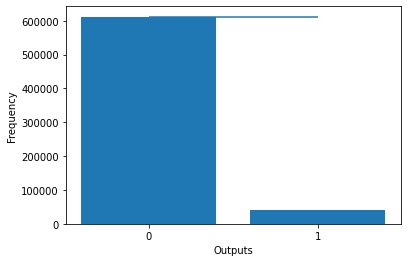

In [101]:
# Plotting the distribution for dataset.
train_y_list = train_y
train_y_list = [str(int(i)) for i in train_y_list]

value, freq = np.unique(train_y_list,return_counts=True)
print(freq)

plt.bar(value,freq,align='center')
plt.xlabel('Outputs')
plt.ylabel('Frequency')
for i in range(len(freq)):
    plt.hlines(freq[i],1,value[i])
plt.show()

In [102]:
intersection = set.intersection(set(item_to_be_deleted1),set(item_to_be_deleted2))
intersection = list(intersection)
print(intersection)

['way', 'ever', 'by', 'it?', 'Is', 'there', 'help', 'other', 'who', 'Which', 'up', 'its', 'from', 'do', 'become', 'this', 'it', 'over', 'first', 'could', 'used', 'in', 'and', 'as', 'make', 'or', 'my', 'between', 'Would', 'just', 'still', 'good', 'out', 'are', 'Can', 'had', 'mean', 'so', 'about', 'same', 'give', 'difference', 'any', 'a', 'using', 'best', 'your', 'we', 'you', 'no', 'India', "I'm", 'why', 'learn', 'but', 'most', 'I', 'has', 'old', 'Why', 'some', 'possible', 'how', 'am', 'at', 'will', 'Should', 'If', 'only', 'think', 'life', 'What', 'of', 'without', 'Does', 'did', 'all', 'they', 'want', 'which', 'with', 'new', 'things', 'our', 'even', 'he', 'more', 'start', 'her', 'person', 'during', 'after', 'while', 'should', 'know', 'is', "What's", 'their', 'be', 'Will', 'getting', 'When', 'when', 'the', 'love', 'Where', 'job', 'if', 'what', 'his', 'find', 'do?', 'see', 'many', 'into', "don't", 'In', 'feel', 'to', 'long', 'better', 'like', 'someone', 'been', 'years', 'Are', 'on', 'can',

In [103]:
for i in intersection:
    if i == "person":
        print(1)


1


## Vectoring Words

In [104]:
vocab = vocab_maj+vocab_min
vocab = set(vocab)
vocab = vocab.difference(intersection)

### Bag Of Words

In [105]:
# TODO max_features = 1500 may need to be altered
cv = CountVectorizer(vocabulary=vocab,ngram_range = (1,3))
X1 = cv.fit_transform(sentences)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:1322: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [106]:
# print(type(X1))
# print(X1.dtype)
# X1 = X1.astype(float)
# print(X1.dtype)

In [107]:
Y1 = train_df['target'].to_numpy().astype(np.float64)
Y1 = Y1[:N]

### TF IDF

In [108]:
cv = TfidfVectorizer(vocabulary=vocab,ngram_range = (1,3))
X2 = cv.fit_transform(sentences)
# print(X2)

In [109]:
print(type(X2))
X2 = X2.astype(float)
print(X2.dtype)

<class 'scipy.sparse.csr.csr_matrix'>
float64


In [110]:
Y2 = Y1

### Train test split data

In [111]:
from sklearn.model_selection import train_test_split 

train_X1, test_X1, train_y1, test_y1 = train_test_split(X1, Y1, train_size=0.6)

train_X2, test_X2, train_y2, test_y2 = train_test_split(X2, Y2, train_size=0.6)

## Model generation

In [112]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

### For data genrated by "Bag of words" method  

In [113]:
lreg1 = LogisticRegression(solver='liblinear')
lreg1.fit(train_X1,train_y1)

LogisticRegression(solver='liblinear')

### For data generated by "TD IDF" method

In [114]:
lreg2 = LogisticRegression(solver='liblinear')
lreg2.fit(train_X2,train_y2)

LogisticRegression(solver='liblinear')

### Confusion Matrix

In [115]:
# Compute and plot the Confusion matrix
def confusion_matrix_for_data(y_test, y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### Predict for X1, Y1

In [116]:
train_yhat1 = lreg1.predict_proba(train_X1)
test_yhat1 = lreg1.predict_proba(test_X1)

# print("training score = ", roc_auc_score(train_y1, train_yhat1[:,1]))
# print("test score = ", roc_auc_score(test_y1,test_yhat1[:,1]))

th = threshold = 0.2
temp = max = 0
for i in range(1000):

    train_output1 = (train_yhat1[:,1] > threshold).astype(int)
    test_output1 = (test_yhat1[:,1] > threshold).astype(int)
    threshold += 0.0001
    temp = f1_score(test_y1.astype(int), test_output1)
    if max<temp:
        max = temp
        th = threshold

In [117]:
print(th)
print(max)

0.21129999999999877
0.5759575755829035


In [118]:
train_yhat1 = lreg1.predict_proba(train_X1)
test_yhat1 = lreg1.predict_proba(test_X1)

threshold = 0.20139999999999986
train_output1 = (train_yhat1[:,1] > threshold).astype(int)
test_output1 = (test_yhat1[:,1] > threshold).astype(int)

print("training score = ", f1_score(train_y1.astype(int), train_output1))
print("testing score = ", f1_score(test_y1.astype(int), test_output1))

training score =  0.6692355174800322
testing score =  0.575553416746872


### Predict for X2, Y2

In [119]:
train_yhat2 = lreg2.predict_proba(train_X2)
test_yhat2 = lreg2.predict_proba(test_X2)

th = threshold = 0.2
temp = max = 0
for i in range(2000):

    threshold += 0.0001
    train_output2 = (train_yhat2[:,1] > threshold).astype(int)
    test_output2 = (test_yhat2[:,1] > threshold).astype(int)
    temp = f1_score(test_y2.astype(int), test_output2)
    if max<temp:
        max = temp
        th = threshold
# print("training score = ", roc_auc_score(train_y2, train_yhat2[:,1]))
# print("test score = ", roc_auc_score(test_y2,test_yhat2[:,1]))

In [120]:
print(th)
print(max)

0.2064999999999993
0.5636507398621936


In [121]:
train_yhat2 = lreg2.predict_proba(train_X2)
test_yhat2 = lreg2.predict_proba(test_X2)

threshold = 0.20049999999999996
train_output2 = (train_yhat2[:,1] > threshold).astype(int)
test_output2 = (test_yhat2[:,1] > threshold).astype(int)


print("training score = ", f1_score(train_y2.astype(int), train_output2))
print("testing score = ", f1_score(test_y2.astype(int), test_output2))

training score =  0.6152947191585714
testing score =  0.5625435394432524


### Saving Data

In [122]:
# data = [["question_text","target"]]
# for i in range(N):
#   data.append([sentences[i],Y1[i]])

In [123]:
# import csv

# with open('processed_train_data.csv','w',newline='') as fp:
#   a = csv.writer(fp, delimiter=',')
#   a.writerows(data)

### Confusion Matrix

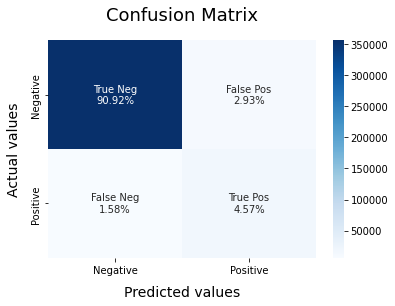

In [124]:
confusion_matrix_for_data(train_y1.astype(int), train_output1)

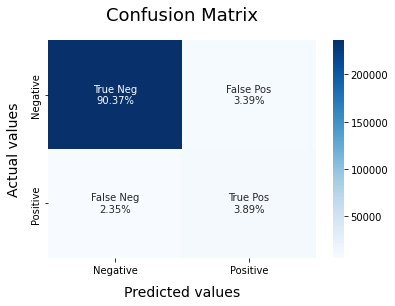

In [125]:
confusion_matrix_for_data(test_y1.astype(int), test_output1)

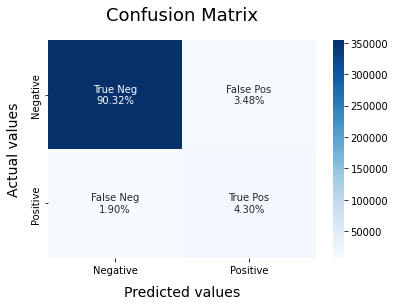

In [126]:
confusion_matrix_for_data(train_y2.astype(int), train_output2)

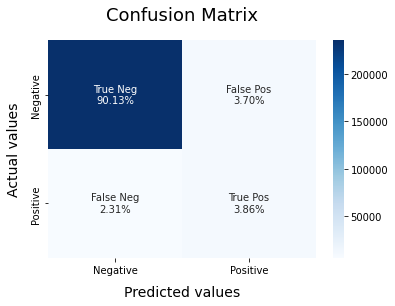

In [127]:
confusion_matrix_for_data(test_y2.astype(int), test_output2)

### Saving Model

In [128]:
# import joblib

# joblib.dump(lreg1,'Using Split LReg1 Model')
# joblib.dump(lreg2,'Using Split LReg2 Model')

In [129]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=25, random_state=0, criterion="entropy")
clf1.fit(train_X1,train_y1)

RandomForestClassifier(criterion='entropy', max_depth=25, random_state=0)

In [130]:
train_yhat1 = clf1.predict_proba(train_X1)
test_yhat1 = clf1.predict_proba(test_X1)

threshold = 0
max = 0
maxi = 0

for i in range(100):
    threshold += 0.01
    train_output1 = (train_yhat1[:,1] > threshold).astype(int)
    test_output1 = (test_yhat1[:,1] > threshold).astype(int)
    if(f1_score(test_y1, test_output1)>max):
        max = f1_score(test_y1, test_output1)
        maxi = threshold

In [131]:
print("maxi = ", maxi) # best threshold
print("max = ", max)

maxi =  0.07
max =  0.5011218130311615


In [132]:
from sklearn.ensemble import AdaBoostClassifier

clf1 = AdaBoostClassifier(n_estimators=500, random_state=0)
clf1.fit(train_X1,train_y1)

In [ ]:
train_yhat1 = clf1.predict_proba(train_X1)
test_yhat1 = clf1.predict_proba(test_X1)

threshold = 0
max = 0
maxi = 0

for i in range(100):
    threshold += 0.01
    train_output1 = (train_yhat1[:,1] > threshold).astype(int)
    test_output1 = (test_yhat1[:,1] > threshold).astype(int)
    if(f1_score(test_y1, test_output1)>max):
        max = f1_score(test_y1, test_output1)
        maxi = threshold

In [ ]:
print("maxi = ", maxi) # best threshold
print("max = ", max)